<a href="https://colab.research.google.com/github/Laxman-Kumar/ISCHOOL-LABS/blob/master/HW08_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IST 687, Standard Homework Heading 

Student name: Laxman Kumar 

Homework number: HW08

Date due: 07 October 

Attribution statement: (choose the statements that are true) 
1. I did this work by myself, with help from the book and the professor 
2. I did this work with help from the book and the professor and R-studio help section

<h3> Code from PE08 </h3>

In [0]:
#Installing readxl package
install.packages('readxl')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [0]:
#Installing ggplot2 library
install.packages('ggplot2')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [0]:
#importing readxl package
library(readxl)
library(ggplot2)

In [0]:
#assigning the url to a variable url1
url1 <- "http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr01.xls"
#creating a tempfile and assigning reference to p1f
p1f <- tempfile()
#dowloading the file specified by url1 variable at the p1f temporary file location
download.file(url1, p1f)
#reading the excel file using read_exel command from path specified by p1f and 
#sheet specified as sheet 1 although we don't have to specify the sheet number since we have only one sheet in the excel file
df<-read_excel(path = p1f, sheet = 1)

In [0]:
#The data (X1, X2, X3, X4) are for each year. I am assigning each description to a variable for the further use.
#x1 represents the fawn count divided by 100
X1 <- "SpringFawnCount"
#represents the size of population of adult antelope divided by 100
X2 <- "AdultAntelopePopulation"
#gives us the values of annual precipitation in inches
X3 <- "AnnualPrecipitation"
#tell us about how severe the winter is value range from 1 to 5 where 1 represents mild winter and 5 represents severe.
X4 <- "WinterSeverityIndex"


#renaming the column names by overwriting the column names by new values listed on the right hand side
colnames(df) <- c(X1,X2,X3,X4)

In [0]:
df

SpringFawnCount,AdultAntelopePopulation,AnnualPrecipitation,WinterSeverityIndex
2.9,9.2,13.2,2
2.4,8.7,11.5,3
2.0,7.2,10.8,4
2.3,8.5,12.3,2
3.2,9.6,12.6,3
1.9,6.8,10.6,5
3.4,9.7,14.1,1
2.1,7.9,11.2,3


<h2>Step 1:  Visualizing a Linear Model.</h2>

<h3>A.	Using ggplot, create a bivariate plot of the number of baby fawns versus adult antelope population. Make sure the Y-axis and X-axis are labeled. Keeping in mind that the number of fawns is the outcome (dependent) variable, which axis should it occupy in your plots? Comment your observations.</h3>

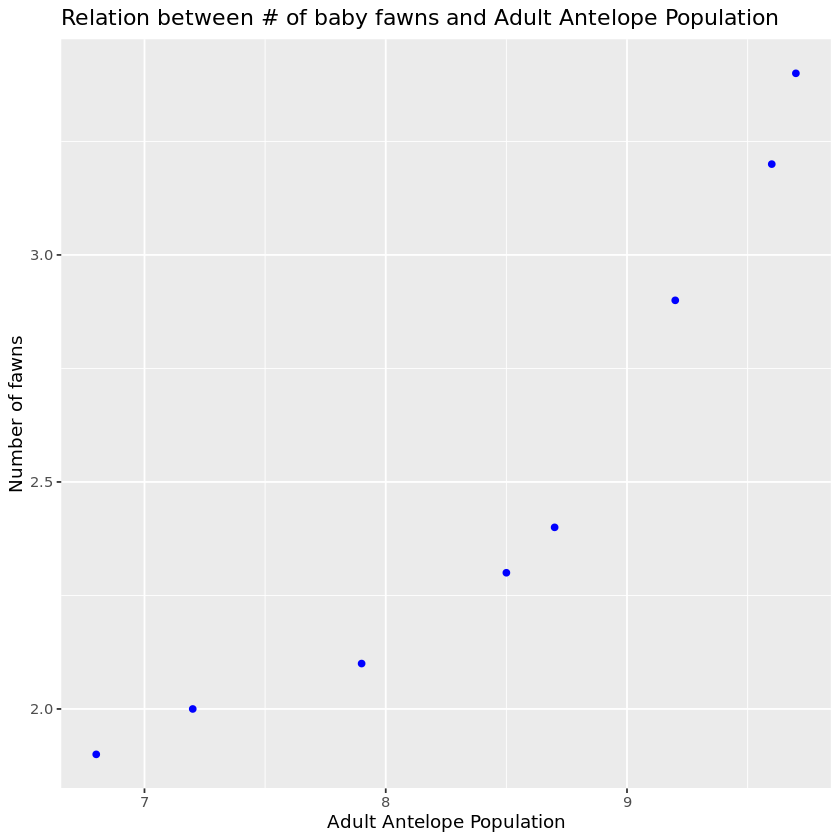

In [0]:
#creating a reference to the ggplot with data passed as df dataframe
#geometry used is geom_point with aesthetics x axis as AdultAntelopePopulation and y axis as SpringFawnCount.
plot <- ggplot(df) + geom_point(aes(x = AdultAntelopePopulation, y = SpringFawnCount),colour = "blue")
plot <- plot + ggtitle("Relation between # of baby fawns and Adult Antelope Population")+xlab("Adult Antelope Population")+ylab("Number of fawns")
plot

#Dependent variable should occupy the y-axis and independent variable are put on x-axis.

#To some extend, relation varies linearly though it doesn't seems strong but there is a positive linear relationship.
#It is a positive relationship since as we can see, the value of points on the y-axis increases w.r.t value of points on x-axis.
#Overall we can say that Number of baby fawns increases as the Population of adult antelope also increases.
#The number of fawns increases with small amount till the Adult Antelope population is 9, but after 9 it shows a greater increase.

<h3>B.	Using similar code, create another bivariate plot of the number of baby fawns versus precipitation that year and comment your observations.</h3>

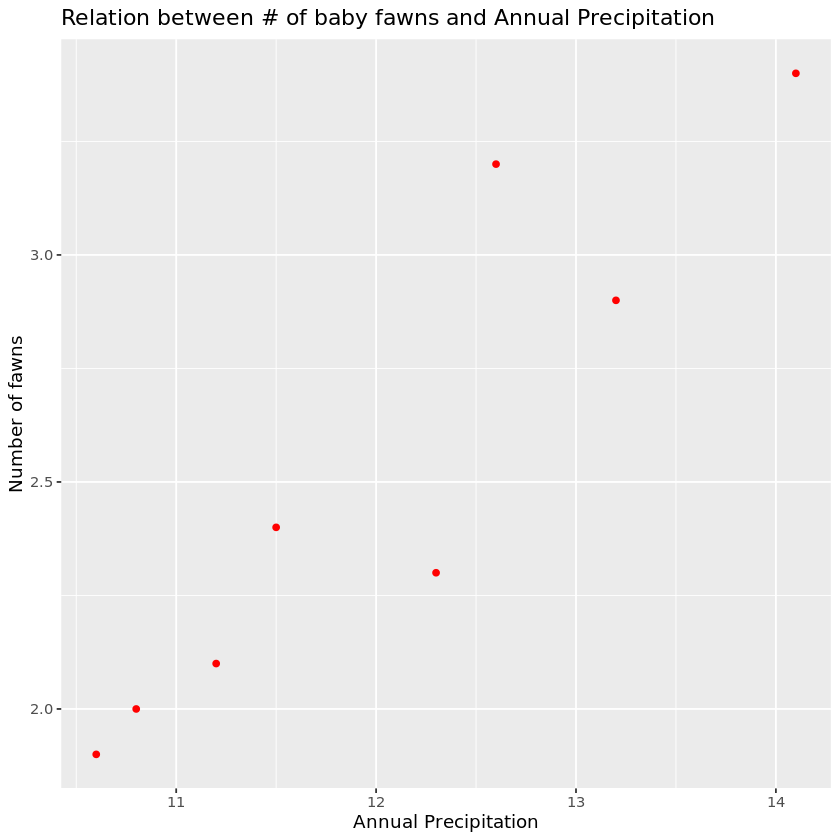

In [0]:
#creating a reference to the ggplot with data passed as df dataframe
#geometry used is geom_point with aesthetics x axis as AdultAntelopePopulation and y axis as SpringFawnCount.
plot <- ggplot(df) + geom_point(aes(x = AnnualPrecipitation, y = SpringFawnCount),colour = "red")
plot <- plot + ggtitle("Relation between # of baby fawns and Annual Precipitation")+xlab("Annual Precipitation")+ylab("Number of fawns")
plot

#Dependent variable should occupy the y-axis and independent variable are put on x-axis.

#There is a weak linear relationship.
#It is a positive relationship since as we can see, the value of points on the y-axis increases w.r.t value of points on x-axis.
#But its not always there are occurences where the value on Number of fawns decreases while the Annual Precipation increases.


<h3>C.	Create a final bivariate plot that examines the number of baby fawns versus severity of the winter and comment your observations.</h3>

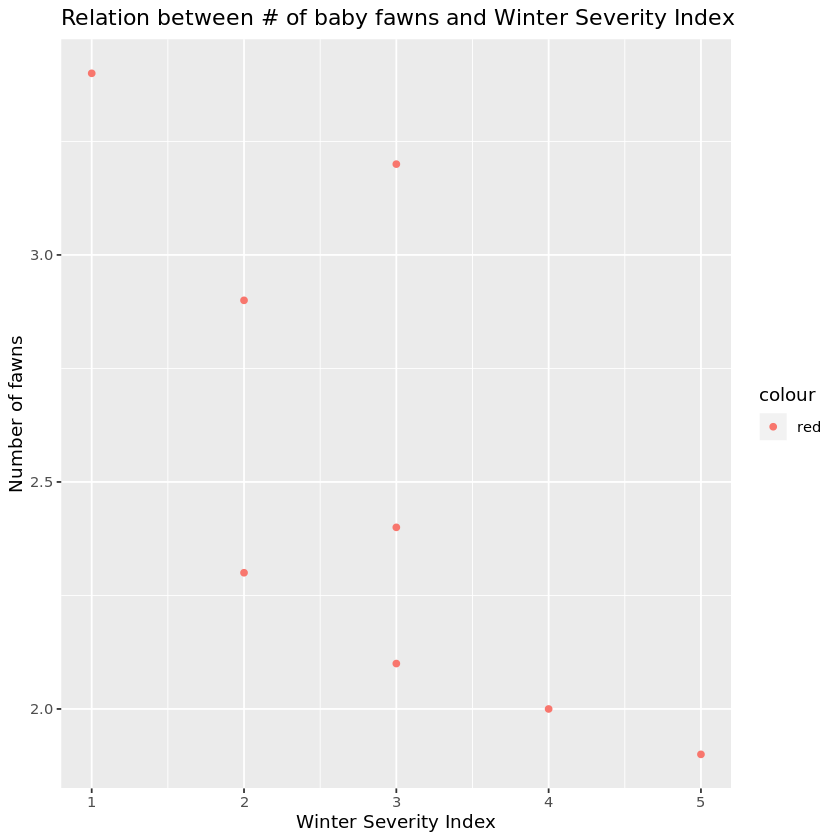

In [0]:
#creating a reference to the ggplot with data passed as df dataframe
#geometry used is geom_point with aesthetics x axis as AdultAntelopePopulation and y axis as SpringFawnCount.
plot <- ggplot(df) + geom_point(aes(x = WinterSeverityIndex, y = SpringFawnCount,colour = "red"))
plot <- plot + ggtitle("Relation between # of baby fawns and Winter Severity Index")+xlab("Winter Severity Index")+ylab("Number of fawns")
plot

#Dependent variable should occupy the y-axis and independent variable are put on x-axis.

#Its really difficult to conclude anything from the plot below since it doesnot shows any pattern.
#There are occurences where one value on x-axis represents more that one value on y-axis. This creates a problem in determining anything
#from the plot
#No relation 

<h2>Step 2:  Creating a regression model.</h2>

<h3>A.	Using the above independent variables (adult antelope pop., precipitation that year, and severity of winter) create a SINGLE regression model that predicts the number of fawns.
(HINT: If you are stuck, refer to page 202 in the textbook for syntax and explanations of lm())</h3>

In [0]:
#Making a linear model with Adult Antelope Population, Annual Precipitation and Winter Severity Index as independent variable 
#and Fawn count as dependent variable
linearModel <- lm(formula = SpringFawnCount ~ AdultAntelopePopulation+AnnualPrecipitation+WinterSeverityIndex, data = df)

#getting the summary of the linear model generated
summary(linearModel)


Call:
lm(formula = SpringFawnCount ~ AdultAntelopePopulation + AnnualPrecipitation + 
    WinterSeverityIndex, data = df)

Residuals:
       1        2        3        4        5        6        7        8 
-0.11533 -0.02661  0.09882 -0.11723  0.02734 -0.04854  0.11715  0.06441 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)             -5.92201    1.25562  -4.716   0.0092 **
AdultAntelopePopulation  0.33822    0.09947   3.400   0.0273 * 
AnnualPrecipitation      0.40150    0.10990   3.653   0.0217 * 
WinterSeverityIndex      0.26295    0.08514   3.089   0.0366 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1209 on 4 degrees of freedom
Multiple R-squared:  0.9743,	Adjusted R-squared:  0.955 
F-statistic: 50.52 on 3 and 4 DF,  p-value: 0.001229


<h3>B.	In a comment, record the R-Squared value of the model and explain its significance to the model. </h3>

As we can see in the summary, we have two values R-Squared and Adjusted R-Squared also known as coefficient of determination. R-Squared value is usefull for Simple Linear Regression while in Multiple Linear Regression we always look onto Adjusted R-Squared for the determination of how well our model fits the data. R-Squared value determines the how well the set of Independent variables can determine the value of dependent variable on the regression line, how close data are fitted to the regression line. R-Squared value will always be greater than adjusted R-squared.

Since this is a multiple linear regression model, we will look at our adjusted R-squared value. Our current model gives 95.5% or 0.955 as adjusted R-sqaured. Our model fits the data on the line with very good precision.

<h3>C.	In a comment, note the predictor that is most statistically significant. How were you able to decide which predictors were significant and which were not?</h3>

We will have to look at the P-value for determining the most significant predictor. P-value with less than 0.05 is considered as significant According to the model created, Annual Precipation index with P-value 0.0217 is the most statistically significant. Other two predictor are Adult Antelope Population & Winter severity index with p-value 0.0273 and 0.0366 respectively. 

<h2>Step 3:  Interpreting the model.</h2>

<h3>A.	Write a block comment that explains in a paragraph your overall interpretation of the model. </h3>

The model created with AdultAntelopePopulation, AnnualPrecipitation and WinterSeverityIndex as independent variable and Number of fawns as dependent variable. The model aims on predicting the number of fawns by using AdultAntelopePopulation, AnnualPrecipitation and WinterSeverityIndex. lm() function is used to build a regression model. Model build has 0.955 adjusted R-squared value, which gives us the information that how well our model fits the predictors on regression line. The predictors well defines the prediction of number of fawns. 

<h3>B.	In a comment, write out the full multiple regression equation and then explain how to interpret the equation</h3>

<b>Multiple Linear Regression
Equation - Y = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4 .... .. . ... bn*xn</b>

<p>Y - represents the dependent variable of predictor</p>
<p>b0 - represents the slope value or coefficient value
<p>b1....bn - represents the coefficient of the respective explanatory/independent variable
<p>x1....xn - represents the independent variable


<p><b>Interpretation</b>
    <p> Y = -5.922 + 0.338*AdultAntelopePopulation + 0.402*AnnualPrecipitation + 0.263*WinterSeverityIndex </p>
 
 <p> 1. Every one unit increase in AdultAntelopePopulation will result in increase in the Number of fawns prediction by 0.338 holding other variables constant.</p>
 <p> 2. Every one unit increase in AnnualPrecipitation will result in increase in Number of fawns prediction by 0.402 holding other variables constant</p>
 <p> 3. Every one unit increase in WinterSeverityIndex will result in increase in Number of fawns prediction by 0.263 holding other variables constant</p>
 